In [1]:
from utils import *
from dataset import *
from model import *
from classifier import *

In [2]:
if torch.cuda.is_available():  
  dev = "cuda:0" 
else:  
  dev = "cpu"  
device = torch.device(dev)  

In [3]:
# Model - SBM, signal = 1, noise = 0.1, diffusion_coef = 0.2, 

dataset = Dataset(tag='EXP1')

dataset.create_syn(n_classes = 5, 
                   n_obs_train = 100, 
                   n_obs_test= 100, 
                   n_features=50,
                   n_char_features = 10, 
                   signal =[1, 1], 
                   diff_coef=[.02, .02], 
                   noise = [.1, .1], 
                   n_communities = 5,
                   probs = [0.9, 0.1], 
                   n_iter=1, 
                   model ='SBM')

# parameter 0.08

50
50
50
50


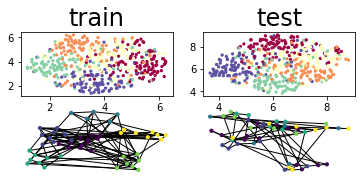

In [4]:
plt.subplot(321)
plot_lowDim(dataset.X_train, dataset.y_train, title='train')
plt.subplot(322)
plot_lowDim(dataset.X_train, dataset.y_train, title ='test')
plt.subplot(323)
comm = draw_graph(dataset.A_train)
plt.subplot(324)
_ = draw_graph(dataset.A_test, comm)
# plt.subplot(325)
# comm = draw_graph(dataset.Ah_train)
# plt.subplot(326)
# _ = draw_graph(dataset.Ah_test, comm)
plt.show()


In [5]:
alpha_grid = [0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24]
# alpha_grid = [0.0, 0.0002, 0.0004, 0.0006, 0.0008, 0.001, 0.0012, 0.0014, 0.0016, 0.0018, 0.002, 0.0022, 0.0024]
alpha_grid = np.array(alpha_grid)

In [6]:
%%time

score_graphs_train = []
score_graphs_eigv_train = []

for alpha_s in alpha_grid:
    
    dataset.create_graph(alphas=alpha_s)

    print(dataset.score_graphs())
    
    score_graphs_train = np.append(score_graphs_train, np.asarray(dataset.score_graphs()[0])[4])
    
    # TPR, TNR, FPR, FNR, accuracy, balanced accuracy
    
    print(dataset.score_graphs_eigv())
    
    score_graphs_eigv_train = np.append(score_graphs_eigv_train, np.asarray(dataset.score_graphs_eigv()[0]))
    
    # The adjacency spectral distance between the two graphs from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7015405/ 
    # Section 2.2.1
    

((1.0, 0.0225, 0.9775, 0.0, 0.1304, 0.5112), (1.0, 0.0217, 0.9783, 0.0, 0.0984, 0.5109))
(56.22, 55.08)
((0.7319, 0.3094, 0.6906, 0.2681, 0.356, 0.5206), (0.6837, 0.3542, 0.6458, 0.3163, 0.38, 0.5189))
(42.06, 36.1)
((0.4638, 0.5755, 0.4245, 0.5362, 0.5632, 0.5197), (0.4796, 0.592, 0.408, 0.5204, 0.5832, 0.5358))
(35.22, 33.75)
((0.3116, 0.7491, 0.2509, 0.6884, 0.7008, 0.5303), (0.2857, 0.7396, 0.2604, 0.7143, 0.704, 0.5126))
(26.48, 30.24)
((0.2101, 0.8597, 0.1403, 0.7899, 0.788, 0.5349), (0.1633, 0.849, 0.151, 0.8367, 0.7952, 0.5061))
(25.22, 23.7)
((0.1449, 0.9379, 0.0621, 0.8551, 0.8504, 0.5414), (0.102, 0.901, 0.099, 0.898, 0.8384, 0.5015))
((21.9+0j), 15.93)
((0.0652, 0.9658, 0.0342, 0.9348, 0.8664, 0.5155), (0.051, 0.9418, 0.0582, 0.949, 0.872, 0.4964))
(15.24, 17.39)
((0.0362, 0.9883, 0.0117, 0.9638, 0.8832, 0.5123), (0.0306, 0.9705, 0.0295, 0.9694, 0.8968, 0.5005))
(15.83, 18.44)
((0.029, 0.9928, 0.0072, 0.971, 0.8864, 0.5109), (0.0204, 0.9835, 0.0165, 0.9796, 0.908, 0.502))
(

In [7]:
alpha_optim = alpha_grid[np.array(np.where(score_graphs_eigv_train==(np.min(score_graphs_eigv_train))))]
alpha_optim

array([[0.12]])

In [8]:
dataset.create_graph(alphas=alpha_optim)
print(dataset.score_graphs())

((0.0652, 0.9658, 0.0342, 0.9348, 0.8664, 0.5155), (0.051, 0.9418, 0.0582, 0.949, 0.872, 0.4964))


35
35
36
35


ValueError: 'c' argument has 35 elements, which is inconsistent with 'x' and 'y' with size 36.

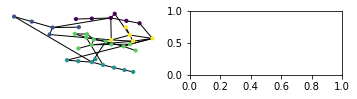

In [9]:
plt.subplot(325)
comm = draw_graph(dataset.Ah_train)
plt.subplot(326) 
_ = draw_graph(dataset.Ah_test, comm)
plt.show()

In [10]:
dataset.create_graph(alphas=alpha_optim-0.04)
print(dataset.score_graphs())

((0.2101, 0.8597, 0.1403, 0.7899, 0.788, 0.5349), (0.1633, 0.849, 0.151, 0.8367, 0.7952, 0.5061))


50
50
50
50


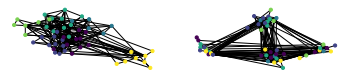

In [25]:
plt.subplot(325)
comm = draw_graph(dataset.Ah_train)
plt.subplot(326) 
_ = draw_graph(dataset.Ah_test, comm)
plt.show()

In [13]:
train_dataloader = dataset._dataloader('train')
test_dataloader  = dataset._dataloader('test')

[1, 3, 1, 1, 4, 1, 4, 3, 4, 3, 2, 3, 1, 2, 1, 2, 1, 4, 0, 2, 1, 2, 3, 3, 2, 0, 0, 0, 3, 3, 3, 0, 4, 2, 2, 2, 2, 1, 2, 3, 1, 4, 1, 1, 1, 3, 2, 4, 0, 4, 1, 3, 0, 1, 4, 0, 4, 1, 2, 0, 4, 0, 1, 2, 1, 3, 0, 3, 1, 4, 0, 4, 2, 4, 1, 3, 0, 4, 4, 4, 0, 0, 4, 0, 1, 2, 2, 3, 4, 1, 4, 3, 1, 3, 2, 0, 2, 1, 2, 3, 4, 3, 0, 1, 0, 0, 4, 4, 2, 0, 0, 0, 3, 2, 0, 1, 2, 2, 1, 4, 2, 4, 0, 1, 4, 4, 3, 4, 3, 3, 0, 4, 3, 2, 3, 2, 1, 4, 3, 1, 1, 3, 2, 3, 0, 2, 1, 1, 4, 0, 2, 3, 0, 3, 2, 4, 4, 2, 0, 3, 4, 4, 2, 0, 2, 4, 2, 4, 1, 1, 0, 4, 3, 4, 0, 2, 1, 0, 2, 3, 2, 2, 3, 2, 4, 0, 0, 3, 1, 2, 1, 2, 4, 2, 2, 2, 1, 1, 2, 1, 2, 4, 0, 0, 2, 0, 0, 3, 4, 3, 1, 0, 3, 1, 4, 3, 4, 2, 4, 1, 2, 1, 3, 3, 0, 2, 4, 0, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 2, 0, 0, 3, 3, 1, 0, 0, 0, 0, 3, 3, 3, 4, 1, 1, 0, 1, 3, 1, 3, 1, 3, 4, 3, 2, 1, 0, 2, 0, 1, 3, 4, 2, 0, 1, 4, 4, 3, 3, 4, 4, 0, 2, 1, 1, 4, 1, 2, 1, 2, 3, 4, 1, 2, 4, 3, 1, 0, 1, 3, 1, 3, 1, 1, 4, 1, 3, 1, 3, 3, 1, 4, 0, 1, 3, 1, 3, 2, 4, 0, 2, 3, 4, 1, 4, 1, 3, 0, 2, 4, 4, 0, 2, 4, 

In [26]:
clf = Classifier(n_features=50,
        n_classes=5,
        n_hidden_GNN=[5],
        n_hidden_FC=[10],
        dropout_FC=0.1, 
        K=1,
        classifier='Chebnet', 
        lr=.01, 
        momentum=.9)
clf.fit(train_dataloader, epochs = 10, verbose=True)

False
[1] loss: 1.633
[2] loss: 1.579
[3] loss: 1.354
[4] loss: 0.964
[5] loss: 0.826
[6] loss: 0.699
[7] loss: 0.645
[8] loss: 0.592
[9] loss: 0.687
[10] loss: 0.595


In [27]:
_ = clf.eval(train_dataloader, verbose=True)
_ = clf.eval(test_dataloader, verbose=True)

Accuracy: 0.872
Confusion Matrix:n [[88  3  9  0  0]
 [ 1 95  3  0  1]
 [ 1  2 95  0  2]
 [ 1  4  9 84  2]
 [ 1  5 14  6 74]]
Precision: 0.886
Recall: 0.872
f1_score: 0.873
Accuracy: 0.790
Confusion Matrix:n [[77  5 14  3  1]
 [ 2 93  3  2  0]
 [ 3  5 89  2  1]
 [ 3  6 13 78  0]
 [ 3  6 22 11 58]]
Precision: 0.819
Recall: 0.790
f1_score: 0.789


In [28]:
clf = Classifier(n_features=50,
        n_classes=5,
        n_hidden_GNN=[],
        n_hidden_FC=[10],
        dropout_FC=0.1, 
        K=1,
        classifier='MLP', 
        lr=.01, 
        momentum=.9)
clf.fit(train_dataloader, epochs = 10, verbose=True)
_ = clf.eval(train_dataloader, verbose=True)
_ = clf.eval(test_dataloader, verbose=True)

True
[1] loss: 1.616
[2] loss: 1.612
[3] loss: 1.593
[4] loss: 1.578
[5] loss: 1.577
[6] loss: 1.570
[7] loss: 1.553
[8] loss: 1.542
[9] loss: 1.535
[10] loss: 1.535
Accuracy: 0.378
Confusion Matrix:n [[43  8  2 23 24]
 [28 24  0 31 17]
 [45  1  1 33 20]
 [12  4  0 63 21]
 [14  6  0 22 58]]
Precision: 0.395
Recall: 0.378
f1_score: 0.331
Accuracy: 0.326
Confusion Matrix:n [[36  7  1 29 27]
 [26 22  0 31 21]
 [35  2  1 41 21]
 [25  1  0 57 17]
 [24  4  0 25 47]]
Precision: 0.405
Recall: 0.326
f1_score: 0.288


In [29]:
# Model - SBM, signal = 5, noise = 0.1, diffusion_coef = 0.2, 

dataset2 = Dataset(tag='EXP2')

dataset2.create_syn(n_classes = 5, 
                   n_obs_train = 100, 
                   n_obs_test= 100, 
                   n_features=50,
                   n_char_features = 10, 
                   signal =[5, 5], 
                   diff_coef=[.02, .02], 
                   noise = [.1, .1], 
                   n_communities = 5,
                   probs = [0.9, 0.1], 
                   n_iter=1, 
                   model ='SBM')

# parameter 0.24

50
50
50
50


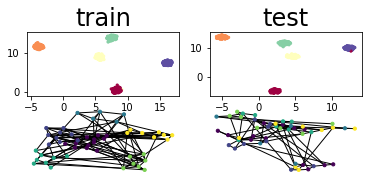

In [30]:
plt.subplot(321)
plot_lowDim(dataset2.X_train, dataset2.y_train, title='train')
plt.subplot(322)
plot_lowDim(dataset2.X_train, dataset2.y_train, title ='test')
plt.subplot(323)
comm = draw_graph(dataset2.A_train)
plt.subplot(324)
_ = draw_graph(dataset2.A_test, comm)
# plt.subplot(325)
# comm = draw_graph(dataset.Ah_train)
# plt.subplot(326)
# _ = draw_graph(dataset.Ah_test, comm)
plt.show()


In [31]:
alpha_grid_2 = [0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.30, 0.32, 0.34, 0.36]
# alpha_grid = [0.0, 0.0002, 0.0004, 0.0006, 0.0008, 0.001, 0.0012, 0.0014, 0.0016, 0.0018, 0.002, 0.0022, 0.0024]
alpha_grid_2 = np.array(alpha_grid_2)

In [32]:
%%time

score_graphs_train = []
score_graphs_eigv_train = []

for alpha_s in alpha_grid_2:
    
    dataset2.create_graph(alphas=alpha_s)

    print(dataset2.score_graphs())
    
    score_graphs_train = np.append(score_graphs_train, np.asarray(dataset2.score_graphs()[0])[4])
    
    # TPR, TNR, FPR, FNR, accuracy, balanced accuracy
    
    print(dataset2.score_graphs_eigv())
    
    score_graphs_eigv_train = np.append(score_graphs_eigv_train, np.asarray(dataset2.score_graphs_eigv()[0]))
    
    # The adjacency spectral distance between the two graphs from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7015405/ 
    # Section 2.2.1

((1.0, 0.0225, 0.9775, 0.0, 0.1304, 0.5112), (1.0, 0.0217, 0.9783, 0.0, 0.0984, 0.5109))
(56.22, 55.08)


C:\Users\aygul\anaconda3\lib\site-packages\sklearn\covariance\_graph_lasso.py:264: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -6.165e-02


((0.6449, 0.3345, 0.6655, 0.3551, 0.3688, 0.4897), (0.5918, 0.3759, 0.6241, 0.4082, 0.3928, 0.4839))
(37.03, 37.42)


C:\Users\aygul\anaconda3\lib\site-packages\sklearn\covariance\_graph_lasso.py:264: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -9.542e-03


((0.4638, 0.5243, 0.4757, 0.5362, 0.5176, 0.494), (0.4184, 0.5773, 0.4227, 0.5816, 0.5648, 0.4978))
(29.27, 35.05)
((0.3623, 0.6511, 0.3489, 0.6377, 0.6192, 0.5067), (0.2653, 0.6753, 0.3247, 0.7347, 0.6432, 0.4703))
(25.84, 28.13)
((0.2826, 0.7158, 0.2842, 0.7174, 0.668, 0.4992), (0.2143, 0.7318, 0.2682, 0.7857, 0.6912, 0.473))
(26.23, 23.7)
((0.2246, 0.7635, 0.2365, 0.7754, 0.704, 0.4941), (0.1633, 0.7786, 0.2214, 0.8367, 0.7304, 0.471))
(26.75, 24.5)
((0.1739, 0.8094, 0.1906, 0.8261, 0.7392, 0.4916), (0.1633, 0.8047, 0.1953, 0.8367, 0.7544, 0.484))
(24.51, 22.79)
((0.1667, 0.8399, 0.1601, 0.8333, 0.7656, 0.5033), (0.1429, 0.8299, 0.1701, 0.8571, 0.776, 0.4864))
(25.26, 22.41)
((0.1594, 0.8579, 0.1421, 0.8406, 0.7808, 0.5087), (0.1327, 0.8411, 0.1589, 0.8673, 0.7856, 0.4869))
(22.83, 22.04)
((0.1594, 0.8714, 0.1286, 0.8406, 0.7928, 0.5154), (0.1224, 0.8559, 0.1441, 0.8776, 0.7984, 0.4892))
(21.22, 21.82)
((0.1522, 0.8903, 0.1097, 0.8478, 0.8088, 0.5212), (0.1224, 0.8724, 0.1276, 0.877

In [33]:
alpha_optim_2 = alpha_grid_2[np.array(np.where(score_graphs_eigv_train==(np.min(score_graphs_eigv_train))))]
alpha_optim_2

array([[0.34]])

In [37]:
dataset2.create_graph(alphas=alpha_optim_2)
print(dataset2.score_graphs())

((0.0362, 0.973, 0.027, 0.9638, 0.8696, 0.5046), (0.0306, 0.9618, 0.0382, 0.9694, 0.8888, 0.4962))


In [39]:
dataset2.create_graph(alphas=alpha_optim_2-0.1)
print(dataset2.score_graphs())

((0.1232, 0.9146, 0.0854, 0.8768, 0.8272, 0.5189), (0.0714, 0.9002, 0.0998, 0.9286, 0.8352, 0.4858))


32
32
32
32


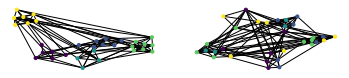

In [41]:
plt.subplot(325)
comm = draw_graph(dataset2.Ah_train)
plt.subplot(326) 
_ = draw_graph(dataset2.Ah_test, comm)
plt.show()

In [42]:
# Model - SBM, signal = 1, noise = 1, diffusion_coef = 0.2, 

dataset3 = Dataset(tag='EXP3')

dataset3.create_syn(n_classes = 5, 
                   n_obs_train = 100, 
                   n_obs_test= 100, 
                   n_features=50,
                   n_char_features = 10, 
                   signal =[1, 1], 
                   diff_coef=[.02, .02], 
                   noise = [1, 1], 
                   n_communities = 5,
                   probs = [0.9, 0.1], 
                   n_iter=1, 
                   model ='SBM')

# parameter 0.07

50
50
50
50


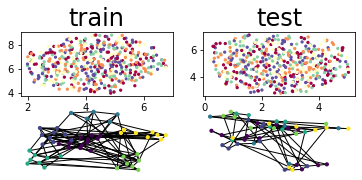

In [43]:
plt.subplot(321)
plot_lowDim(dataset3.X_train, dataset3.y_train, title='train')
plt.subplot(322)
plot_lowDim(dataset3.X_train, dataset3.y_train, title ='test')
plt.subplot(323)
comm = draw_graph(dataset3.A_train)
plt.subplot(324)
_ = draw_graph(dataset3.A_test, comm)
# plt.subplot(325)
# comm = draw_graph(dataset.Ah_train)
# plt.subplot(326)
# _ = draw_graph(dataset.Ah_test, comm)
plt.show()

In [44]:
%%time

score_graphs_train = []
score_graphs_eigv_train = []

for alpha_s in alpha_grid:
    
    dataset3.create_graph(alphas=alpha_s)

    print(dataset3.score_graphs())
    
    score_graphs_train = np.append(score_graphs_train, np.asarray(dataset3.score_graphs()[0])[4])
    
    # TPR, TNR, FPR, FNR, accuracy, balanced accuracy
    
    print(dataset3.score_graphs_eigv())
    
    score_graphs_eigv_train = np.append(score_graphs_eigv_train, np.asarray(dataset3.score_graphs_eigv()[0]))
    
    # The adjacency spectral distance between the two graphs from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7015405/ 
    # Section 2.2.1

((1.0, 0.0225, 0.9775, 0.0, 0.1304, 0.5112), (1.0, 0.0217, 0.9783, 0.0, 0.0984, 0.5109))
(56.22, 55.08)
((0.6739, 0.3723, 0.6277, 0.3261, 0.4056, 0.5231), (0.6837, 0.3646, 0.6354, 0.3163, 0.3896, 0.5241))
(42.56, 40.13)
((0.3768, 0.6412, 0.3588, 0.6232, 0.612, 0.509), (0.3469, 0.6311, 0.3689, 0.6531, 0.6088, 0.489))
(30.38, 29.56)
((0.1884, 0.8255, 0.1745, 0.8116, 0.7552, 0.507), (0.1327, 0.8351, 0.1649, 0.8673, 0.78, 0.4839))
(27.12, 22.5)
((0.1232, 0.9326, 0.0674, 0.8768, 0.8432, 0.5279), (0.0714, 0.9392, 0.0608, 0.9286, 0.8712, 0.5053))
(19.54, (19.12-0j))
((0.058, 0.973, 0.027, 0.942, 0.872, 0.5155), (0.0306, 0.9757, 0.0243, 0.9694, 0.9016, 0.5032))
((16.12+0j), (16.88+0j))
((0.0145, 0.991, 0.009, 0.9855, 0.8832, 0.5027), (0.0204, 0.9948, 0.0052, 0.9796, 0.9184, 0.5076))
(15.9, 14.11)
((0.0, 0.9982, 0.0018, 1.0, 0.888, 0.4991), (0.0102, 0.9991, 0.0009, 0.9898, 0.9216, 0.5047))
(15.59, 12.97)
((0.0, 1.0, 0.0, 1.0, 0.8896, 0.5), (0.0, 1.0, 0.0, 1.0, 0.9216, 0.5))
(16.61, 14.0)
((0.0,

In [45]:
alpha_optim_3 = alpha_grid[np.array(np.where(score_graphs_eigv_train==(np.min(score_graphs_eigv_train))))]
alpha_optim_3

array([[0.14]])

In [48]:
dataset3.create_graph(alphas=alpha_optim_3)
print(dataset3.score_graphs())

((0.0, 0.9982, 0.0018, 1.0, 0.888, 0.4991), (0.0102, 0.9991, 0.0009, 0.9898, 0.9216, 0.5047))


In [50]:
dataset3.create_graph(alphas=alpha_optim_3-0.07)
print(dataset3.score_graphs())

((0.1449, 0.8921, 0.1079, 0.8551, 0.8096, 0.5185), (0.0918, 0.8932, 0.1068, 0.9082, 0.8304, 0.4925))


50
50
50
50


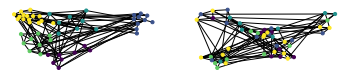

In [53]:
plt.subplot(325)
comm = draw_graph(dataset3.Ah_train)
plt.subplot(326) 
_ = draw_graph(dataset3.Ah_test, comm)
plt.show()